# Mall Customers Clustering

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Cleaning Data

In [6]:
df.drop(['CustomerID'],inplace=True, axis=1)
df.rename(columns = {'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'}, inplace = True)
df.head(5)

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df

In [8]:
X.head(5)

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


<AxesSubplot:xlabel='Age', ylabel='Density'>

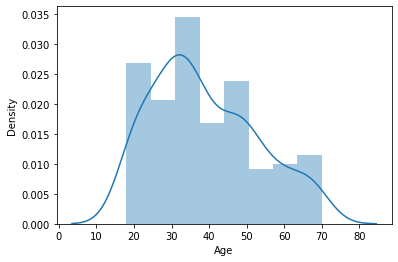

In [9]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Spending Score', ylabel='Density'>

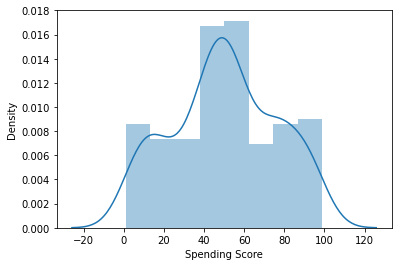

In [10]:
sns.distplot(df['Spending Score'])

## Elbow Method For Selecting Optimal K 

In [11]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

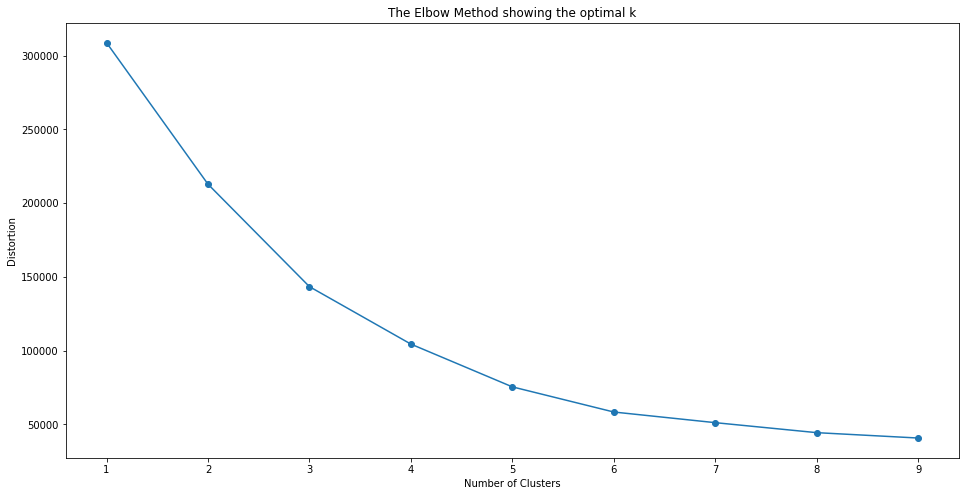

In [12]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Analysis

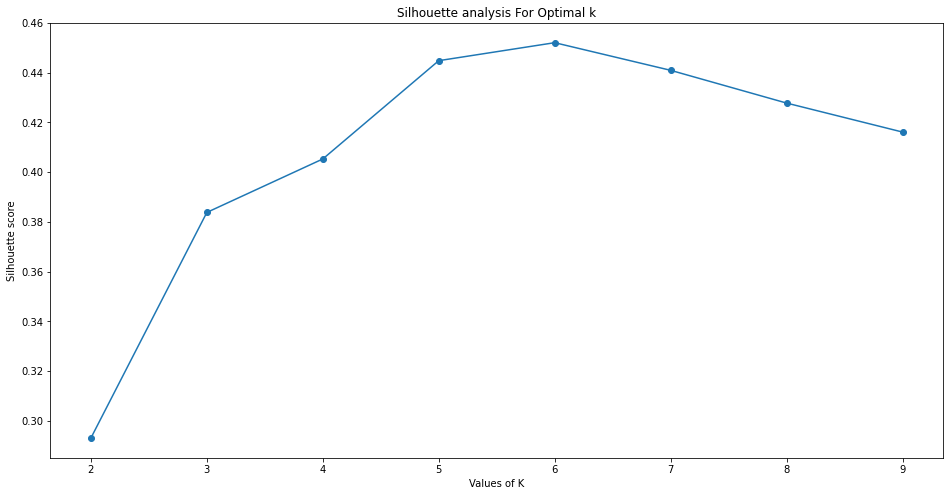

In [13]:
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.figure(figsize=(16,8))
plt.plot(range_n_clusters,silhouette_avg,'o-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## K = 5 Clustering

In [14]:
# n=5 clustering
km_5 = KMeans(n_clusters=5, init = 'k-means++', n_init=10,max_iter=300, random_state=0)
y_km_5 = km_5.fit_predict(X)

In [15]:
km_5.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [16]:
cluster_labels = np.unique(y_km_5)
n_clusters = cluster_labels.shape[0]
np.unique(y_km_5,return_counts = True)

(array([0, 1, 2, 3, 4]), array([23, 39, 79, 36, 23], dtype=int64))

In [17]:
df['ClusterModel1'] = pd.Series(y_km_5, index=df.index)

In [18]:
df.head()

,Gender,Age,Annual Income,Spending Score,ClusterModel1
0,1,19,15,39,0
1,1,21,15,81,4
2,0,20,16,6,0
3,0,23,16,77,4
4,0,31,17,40,0


### Result

In [19]:
df_grp = df[['ClusterModel1','Gender','Age','Annual Income','Spending Score']].groupby('ClusterModel1').mean()
df_grp['ClusterModel1_Count'] = np.unique(y_km_5,return_counts = True)[1]
df_grp.round()

,Gender,Age,Annual Income,Spending Score,ClusterModel1_Count
ClusterModel1,,,,,
0,0.0,45.0,26.0,21.0,23
1,0.0,33.0,87.0,82.0,39
2,0.0,43.0,55.0,50.0,79
3,1.0,41.0,88.0,18.0,36
4,0.0,26.0,26.0,79.0,23


### Scatter Plot

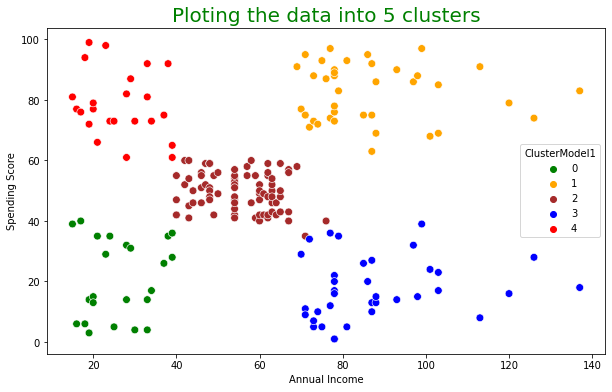

In [20]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into 5 clusters", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income", y="Spending Score", hue="ClusterModel1", s=60, palette=['green','orange','brown','blue','red'])
plt.show()

## K = 6 Clustering

In [21]:
# n=6 clustering
km_6 = KMeans(n_clusters=6, init = 'k-means++', n_init=10,max_iter=300, random_state=0)
y_km_6 = km_6.fit_predict(X)

In [22]:
cluster_labels6 = np.unique(y_km_6)
n_clusters6 = cluster_labels6.shape[0]
np.unique(y_km_6,return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([35, 39, 44, 22, 38, 22], dtype=int64))

In [23]:
df['ClusterModel2'] = pd.Series(y_km_6, index=df.index)

In [24]:
df.head()

,Gender,Age,Annual Income,Spending Score,ClusterModel1,ClusterModel2
0,1,19,15,39,0,5
1,1,21,15,81,4,3
2,0,20,16,6,0,5
3,0,23,16,77,4,3
4,0,31,17,40,0,5


### Result

In [25]:
df_grp = df[['ClusterModel2','Gender','Age','Annual Income','Spending Score']].groupby('ClusterModel2').mean()
df_grp['ClusterModel2_Count'] = np.unique(y_km_6,return_counts = True)[1]
df_grp.round()

,Gender,Age,Annual Income,Spending Score,ClusterModel2_Count
ClusterModel2,,,,,
0,1.0,42.0,88.0,17.0,35
1,0.0,33.0,87.0,82.0,39
2,0.0,56.0,54.0,49.0,44
3,0.0,25.0,26.0,79.0,22
4,0.0,27.0,57.0,49.0,38
5,0.0,44.0,26.0,20.0,22


### Scatter Plot

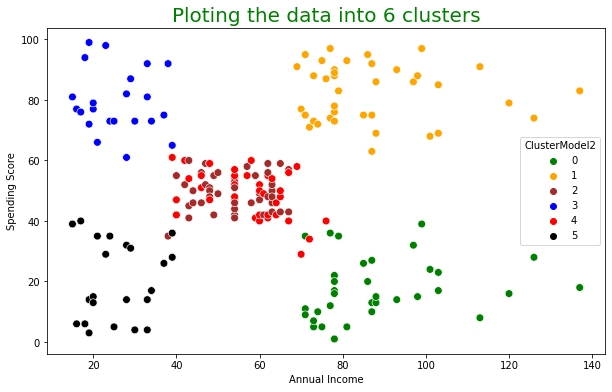

In [26]:
plt.figure(figsize=(10,6))

plt.title("Ploting the data into 6 clusters", fontsize=20, color="green")
sns.scatterplot(data=df, x="Annual Income", y="Spending Score", hue="ClusterModel2", s=60, palette=['green','orange','brown','blue','red','black'])
plt.show()

# Predict Spending Score

In [27]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X, y = df.drop(['Spending Score','ClusterModel2'], axis=1), df['Spending Score']

In [30]:
robust = RobustScaler()
minmax = MinMaxScaler()

for col in X.columns:
  X[col] = robust.fit_transform(X[col].values.reshape(-1,1))
  X[col] = minmax.fit_transform(X[col].values.reshape(-1,1))

In [31]:
y = robust.fit_transform(y.values.reshape(-1,1))
y = minmax.fit_transform(y.reshape(-1,1))

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [33]:
x_train_, x_val, y_train_, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=56)

## Selecting Optimal Model

In [34]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
def model_selection(x_train_, x_val, y_train_, y_val, model):
  model = model()
  model.fit(x_train_, y_train_.ravel())

  pred = model.predict(x_val)

  acc = r2_score(y_val, pred)
  error = np.sqrt(mean_squared_error(y_val, pred))
  train_score = model.score(x_train_, y_train_)
  val_score = model.score(x_val, y_val)

  print('Acc :', acc*100)
  print('\n')
  print('Error:', error)
  print('\n')
  print('Train Score:', train_score*100)
  print('\n')
  print('Val Score:', val_score*100)
  print('\n')
  print('Is overfitting:', True if train_score>val_score else False)
  print('\n')
  print('Overfitting by:',train_score*100-val_score*100)

### Extra Trees Regressor

In [37]:
extratrees = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreesRegressor)
extratrees

Acc : 83.39289835632925


Error: 0.10791311216156847


Train Score: 99.98592200526957


Val Score: 83.39289835632925


Is overfitting: True


Overfitting by: 16.593023648940317


### Gradient Boosting Regressor

In [38]:
gradient = model_selection(x_train_, x_val, y_train_, y_val, GradientBoostingRegressor)
gradient

Acc : 86.0792163135323


Error: 0.0988004990400539


Train Score: 97.23953444797547


Val Score: 86.0792163135323


Is overfitting: True


Overfitting by: 11.160318134443173


### Random Forest Regressor

In [39]:
forest = model_selection(x_train_, x_val, y_train_, y_val, RandomForestRegressor)
forest

Acc : 88.42589290159486


Error: 0.09008885018931363


Train Score: 97.57004503286552


Val Score: 88.42589290159486


Is overfitting: True


Overfitting by: 9.144152131270658


### Ada Boost Regressor

In [40]:
ada = model_selection(x_train_, x_val, y_train_, y_val, AdaBoostRegressor)
ada

Acc : 87.88805263353862


Error: 0.0921582635418647


Train Score: 91.27172107053897


Val Score: 87.88805263353862


Is overfitting: True


Overfitting by: 3.3836684370003525


### Decision Tree Regressor

In [41]:
Dtree = model_selection(x_train_, x_val, y_train_, y_val, DecisionTreeRegressor)
Dtree

Acc : 85.12793370213815


Error: 0.10212050459820457


Train Score: 99.98592200526957


Val Score: 85.12793370213815


Is overfitting: True


Overfitting by: 14.857988303131421


### Extra Tree Regressor

In [42]:
extratree = model_selection(x_train_, x_val, y_train_, y_val, ExtraTreeRegressor)
extratree

Acc : 73.58758147662101


Error: 0.13609161906478714


Train Score: 99.98592200526957


Val Score: 73.58758147662101


Is overfitting: True


Overfitting by: 26.39834052864856


### K Neighbors Regressor

In [43]:
neighbour = model_selection(x_train_, x_val, y_train_, y_val, KNeighborsRegressor)
neighbour

Acc : 87.35340733597732


Error: 0.09417032319647617


Train Score: 89.32158196186535


Val Score: 87.35340733597732


Is overfitting: True


Overfitting by: 1.9681746258880253


## Selected Model

In [44]:
model = KNeighborsRegressor()
model.fit(x_train, y_train.ravel())

KNeighborsRegressor()

In [45]:
pred = model.predict(x_test)
pred*100

array([46.53061224, 11.02040816, 50.81632653, 83.67346939, 21.02040816,
       85.91836735, 23.46938776, 78.36734694, 25.30612245, 77.55102041,
       49.59183673, 51.2244898 , 51.42857143, 17.95918367, 52.04081633,
       41.02040816, 51.83673469, 11.42857143, 50.        , 49.79591837,
       49.79591837, 85.51020408, 23.67346939, 49.3877551 , 76.93877551,
       46.93877551, 52.24489796, 48.97959184, 17.95918367, 88.97959184,
       52.24489796, 23.46938776, 81.2244898 , 46.93877551, 85.51020408,
        6.73469388, 82.44897959, 50.6122449 , 44.28571429, 82.04081633])

### Result

In [46]:
accuracy = r2_score(y_test, pred)
accuracy*100

78.75964322496648

In [47]:
error = np.sqrt(mean_squared_error(y_test, pred))
error

0.1066826852646528

In [48]:
overfit= model.score(x_train, y_train)*100 - model.score(x_test, y_test)*100
overfit

12.423430817623142